## RICARDO TALAVERA DATA SCIENTIST

1.- Import the data located at this link ("https://github.com/alexanderquispe/Diplomado_PUCP/raw/main/_data/institutos1.csv"). It has information on Tech Institutes' total vacancies, total applicants, total entrants, and total enrolled. Moreover, the institutes are geolocated.

Use this shapefile to generate a Choropleth map of the total institutes' vacancies by the department. Use the overlay function (link and JN) to intersect institutes dataset with shapefiles

In [1]:
import pandas as pd

data = pd.read_csv("https://github.com/alexanderquispe/Diplomado_PUCP/raw/main/_data/institutos1.csv")
data.head(3)

,cod_mod,ltimoden_metaatencion,cuentadeid_postulante_procesoadm,sumaden_flagingresante,sumaden_flagmatriculado,ratio,ratio1,dif,dif1,nlat_ie,...,population_ccpp,altitude,Dblock1km,Dblock2km,Dblock3km,Dblock5km,Dblock10km,Dblock20km,Dblock30km,_merge
0,207597,307,481,302,301,0.980456,1.566775,-6,174,-13.52107,...,106400.0,3386.0,14840369,742184,494123,296073,148036,7418,4912,matched (3)
1,207613,240,502,204,204,0.850000,2.091667,-36,262,-13.63997,...,45864.0,2342.0,14970470,748235,499156,299094,149047,7423,4915,matched (3)
2,239970,537,1047,484,476,0.886406,1.949721,-61,510,-15.47827,...,216716.0,3831.0,17000163,850081,566054,340032,170016,8508,5605,matched (3)


In [2]:
data.shape

(215, 21)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cod_mod                           215 non-null    int64  
 1   ltimoden_metaatencion             215 non-null    int64  
 2   cuentadeid_postulante_procesoadm  215 non-null    int64  
 3   sumaden_flagingresante            215 non-null    int64  
 4   sumaden_flagmatriculado           215 non-null    int64  
 5   ratio                             215 non-null    float64
 6   ratio1                            215 non-null    float64
 7   dif                               215 non-null    int64  
 8   dif1                              215 non-null    int64  
 9   nlat_ie                           215 non-null    float64
 10  nlong_ie                          215 non-null    float64
 11  population_ccpp                   194 non-null    float64
 12  altitude

In [4]:
data.isna().sum()

cod_mod                              0
ltimoden_metaatencion                0
cuentadeid_postulante_procesoadm     0
sumaden_flagingresante               0
sumaden_flagmatriculado              0
ratio                                0
ratio1                               0
dif                                  0
dif1                                 0
nlat_ie                              0
nlong_ie                             0
population_ccpp                     21
altitude                            21
Dblock1km                            0
Dblock2km                            0
Dblock3km                            0
Dblock5km                            0
Dblock10km                           0
Dblock20km                           0
Dblock30km                           0
_merge                               0
dtype: int64

In [5]:
import geopandas as gpd

In [6]:
data_geo = gpd.GeoDataFrame(data, crs =  "EPSG:4326", 
                            geometry=gpd.points_from_xy(data.nlong_ie,data.nlat_ie))

path_shape = "../Diplomado_PUCP/_data/INEI_LIMITE_DEPARTAMENTAL/INEI_LIMITE_DEPARTAMENTAL.shp"
shape_department = gpd.read_file(path_shape)

intersection_data_geo = gpd.overlay(data_geo,shape_department,how="intersection")

vars_sum=["ltimoden_metaatencion","cuentadeid_postulante_procesoadm","sumaden_flagingresante",
          "sumaden_flagmatriculado"]

total_department = intersection_data_geo.groupby(["CCDD"],as_index="False")[vars_sum].sum()

total_department_shape = shape_department.merge(total_department, on= "CCDD")


In [7]:
data_geo.head(2)

,cod_mod,ltimoden_metaatencion,cuentadeid_postulante_procesoadm,sumaden_flagingresante,sumaden_flagmatriculado,ratio,ratio1,dif,dif1,nlat_ie,...,altitude,Dblock1km,Dblock2km,Dblock3km,Dblock5km,Dblock10km,Dblock20km,Dblock30km,_merge,geometry
0,207597,307,481,302,301,0.980456,1.566775,-6,174,-13.52107,...,3386.0,14840369,742184,494123,296073,148036,7418,4912,matched (3),POINT (-71.97748 -13.52107)
1,207613,240,502,204,204,0.850000,2.091667,-36,262,-13.63997,...,2342.0,14970470,748235,499156,299094,149047,7423,4915,matched (3),POINT (-72.88261 -13.63997)


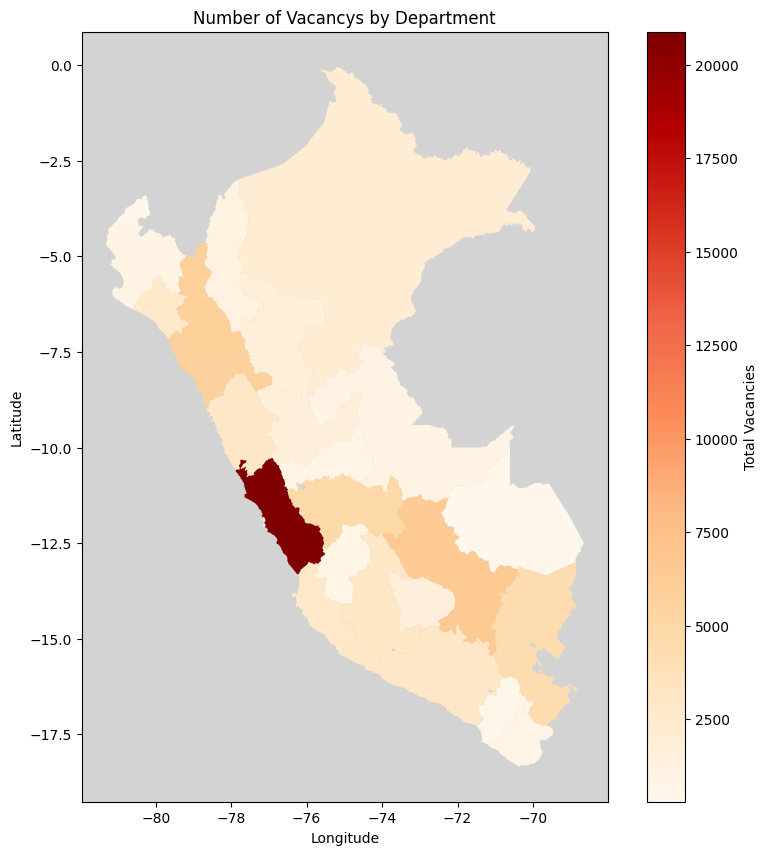

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))

total_department_shape.plot(column='ltimoden_metaatencion', cmap='OrRd', ax=ax, legend=True, legend_kwds={'label': 'Total Vacancies'})

# set the title and axis labels
ax.set_title('Number of Vacancys by Department')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# add color for NA values
ax.set_facecolor('lightgrey')

2.- Make an interactive map of markes using visual_html function and show total vacancies, applicants, entrants, and enrolled information in a table popup. Additionally, use "university" as icon.
Take this map as an example

In [49]:
import folium
from folium.plugins import MarkerCluster

# create map centered on Peru
mapa = folium.Map(location=[-9.189967, -75.015152], zoom_start=6)

# create marker cluster
marker_cluster = MarkerCluster().add_to(mapa)

# define function to create html table popup
def create_popup_table(row):
    html = '<table style="width:100%">' \
           '<tr><td><b>Total vacancies:</b></td><td>{}</td></tr>' \
           '<tr><td><b>Total applicants:</b></td><td>{}</td></tr>' \
           '<tr><td><b>Total entrants:</b></td><td>{}</td></tr>' \
           '<tr><td><b>Total enrolled:</b></td><td>{}</td></tr>' \
           '</table>'.format(row['ltimoden_metaatencion'],
                              row['cuentadeid_postulante_procesoadm'],
                              row['sumaden_flagingresante'],
                              row['sumaden_flagmatriculado'])
    return folium.Popup(html, max_width=500)

# loop through data and add markers to map
for i, row in data.iterrows():
    folium.Marker(location=[row['geometry'].y, row['geometry'].x],
                  popup=create_popup_table(row),
                  icon=folium.Icon(icon='university', prefix='fa')).add_to(marker_cluster)
    
# ajusta el zoom del mapa a los límites de los marcadores
mapa.fit_bounds(mapa.get_bounds())

# display map
mapa


3.- Generate the ratio of applicants by vacancies and store it in a new columns called ratio_applicants_vacancies ( total applicants / total vacancies ). Then, generate a cluster map with two groups of marker clusters. The first group should be compound by those institutes where there were more applicants than vacancies. Name this group as Applicant Surplus. The second group should be compound by those institutes where there were more vacancies than applicants. Name this group as Applicant Deficit.

In [33]:
data['ratio_applicants_vacancies'] = data['cuentadeid_postulante_procesoadm'] / data['ltimoden_metaatencion']

In [56]:
# crea un mapa centrado en Perú
mapa = folium.Map(location=[-9.189967, -75.015152], zoom_start=6)

# crea dos grupos de marcadores para Applicant Surplus y Applicant Deficit
applicant_surplus_cluster = MarkerCluster(name='Applicant Surplus').add_to(mapa)
applicant_deficit_cluster = MarkerCluster(name='Applicant Deficit').add_to(mapa)

# itera sobre los datos y agrega marcadores a cada grupo de marcadores según el ratio de postulantes por vacantes
for i, row in data.iterrows():
    ratio = row['ratio_applicants_vacancies']
    location = [row['geometry'].y, row['geometry'].x]
    popup = create_popup_table(row)
    if ratio > 1:  # si hay más postulantes que vacantes
        icon = folium.Icon(color='red', icon='university', prefix='fa')
        folium.Marker(location=location, popup=popup, icon=icon).add_to(applicant_surplus_cluster)
    else:  # si hay más vacantes que postulantes
        icon = folium.Icon(color='green', icon='university', prefix='fa')
        folium.Marker(location=location, popup=popup, icon=icon).add_to(applicant_deficit_cluster)

# agrega un controlador de capas al mapa para alternar entre Applicant Surplus y Applicant Deficit
folium.LayerControl().add_to(mapa)


# muestra el mapa
mapa
